In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_df.smoker.unique()

array(['yes', 'no'], dtype=object)

# Langkah 1: Descriptive Analysis

<AxesSubplot:xlabel='sex', ylabel='count'>

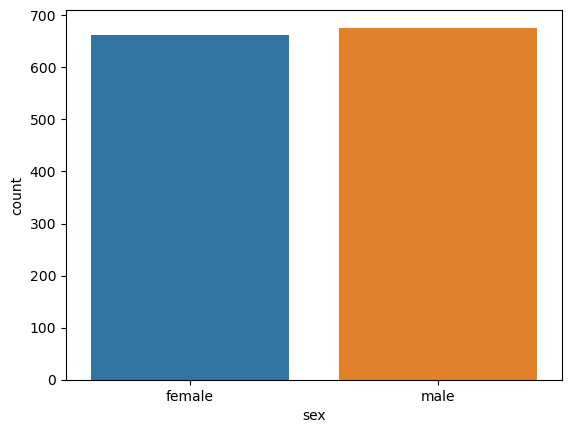

In [7]:
sns.countplot(x=insurance_df.sex)

1. Rata-rata umur pengguna

In [8]:
avg_age = insurance_df.age.mean()
avg_age

39.20702541106129

2. Rata-rata nilai BMI dari pengguna yang merokok

In [9]:
smoker_bmi = insurance_df.age[insurance_df.smoker == 'yes']
non_smoker_bmi = insurance_df.age[insurance_df.smoker == 'no']
smoker_bmi.mean(), non_smoker_bmi.mean()

(38.51459854014598, 39.38533834586466)

3. Apakah variansi dari data charges perokok dan non perokok sama?

In [10]:
charges_smoker = insurance_df.charges[insurance_df.smoker == 'yes']
charges_nonsmoker = insurance_df.charges[insurance_df.smoker == 'no']

statistics.variance(charges_smoker), statistics.variance(charges_nonsmoker)

(133207311.20634925, 35925420.49611173)

4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [11]:
male_smoker_age = insurance_df.age[insurance_df.sex == 'male']
female_smoker_age = insurance_df.age[insurance_df.sex == 'female']
male_smoker_age.mean(), female_smoker_age.mean()

(38.917159763313606, 39.503021148036254)

5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [12]:
smoker_charges = insurance_df.charges[insurance_df.smoker == 'yes']
non_smoker_charges = insurance_df.charges[insurance_df.smoker == 'no']
smoker_charges.mean(), non_smoker_charges.mean()

(32050.23183153285, 8434.268297856199)

# Langkah 2: Analisa Variabel Kategorik (PMF)

In [13]:
male = insurance_df[insurance_df.sex == 'male']
female = insurance_df[insurance_df.sex == 'female']
smoker = insurance_df[insurance_df.smoker == 'yes']
nonsmoker = insurance_df[insurance_df.smoker == 'no']

1. Gender mana yang memiliki tagihan paling tinggi?

In [14]:
male.charges.mean(),  female.charges.mean()

(13956.751177721886, 12569.57884383534)

2. Apakah setiap region memiliki proporsi data banyak orang yang sama?

<AxesSubplot:xlabel='region', ylabel='count'>

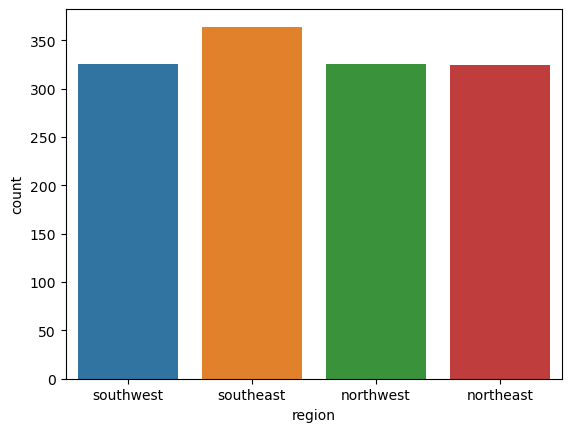

In [15]:
sns.countplot(x='region', data=insurance_df)

3. Mana yang lebih tinggi proporsi perokok atau non perokok?

<AxesSubplot:xlabel='smoker', ylabel='count'>

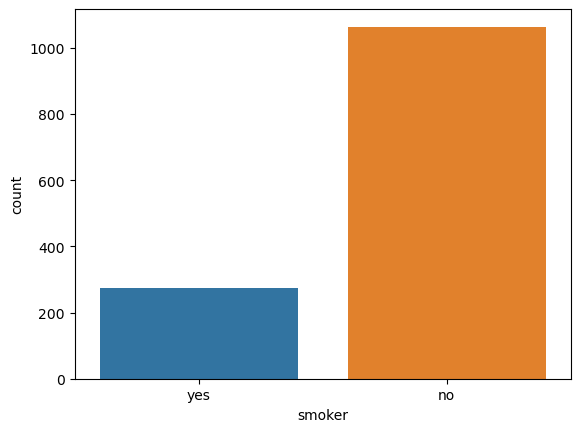

In [16]:
sns.countplot(data=insurance_df, x='smoker')

In [17]:
n_female = len(female)
n_male = len(male)
n_smoker = len(smoker)
n_data = len(insurance_df)

4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [18]:
n_female_smoker = female.sex[insurance_df.smoker == 'yes'].count()
p_female_if_smoker = n_female_smoker/n_smoker
p_female_if_smoker

0.4197080291970803

5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [19]:
n_male_smoker = male.sex[insurance_df.smoker == 'yes'].count()
p_male_if_smoker = n_male_smoker/n_smoker
p_male_if_smoker

0.5802919708029197

# Continuous Variable Analysis

###### 1. Mana yang lebih mungkin terjadi:

    a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

    b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [20]:
Hbmi_Hcharges = insurance_df[(insurance_df.bmi > 25) 
                             & (insurance_df.charges > 16700)] 
Lbmi_Hcharges = insurance_df[(insurance_df.bmi <= 25) 
                             & (insurance_df.charges > 16700)]

print(f'Peluang seseorang dengan bmi > 25 mendapat tagihan > 16.7k: {len(Hbmi_Hcharges)/len(insurance_df)}') 
print(f'Peluang seseorang dengan bmi < 25 mendapat tagihan > 16.7k: {len(Lbmi_Hcharges)/len(insurance_df)}') 

Peluang seseorang dengan bmi > 25 mendapat tagihan > 16.7k: 0.21150971599402094
Peluang seseorang dengan bmi < 25 mendapat tagihan > 16.7k: 0.03811659192825112


###### 2. Mana yang lebih mungkin terjadi:

    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [21]:
smoker_Hbmi_Hcharges = smoker[(smoker.bmi > 25) 
                             & (smoker.charges > 16700)]
nonsmoker_Hbmi_Hcharges = nonsmoker[(nonsmoker.bmi > 25) 
                             & (nonsmoker.charges > 16700)]
print(f'Peluang perokok dengan bmi > 25 mendapat tagihan > 16.7k: {len(smoker_Hbmi_Hcharges)/len(insurance_df)}') 
print(f'Peluang non-perokok dengan bmi > 25 mendapat tagihan > 16.7k: {len(nonsmoker_Hbmi_Hcharges)/len(insurance_df)}') 

Peluang perokok dengan bmi > 25 mendapat tagihan > 16.7k: 0.16068759342301944
Peluang non-perokok dengan bmi > 25 mendapat tagihan > 16.7k: 0.05082212257100149


# Langkah 4: Analisa Korelasi Variabel

In [22]:
insurance_df.corr().style.background_gradient(cmap='PuBu')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


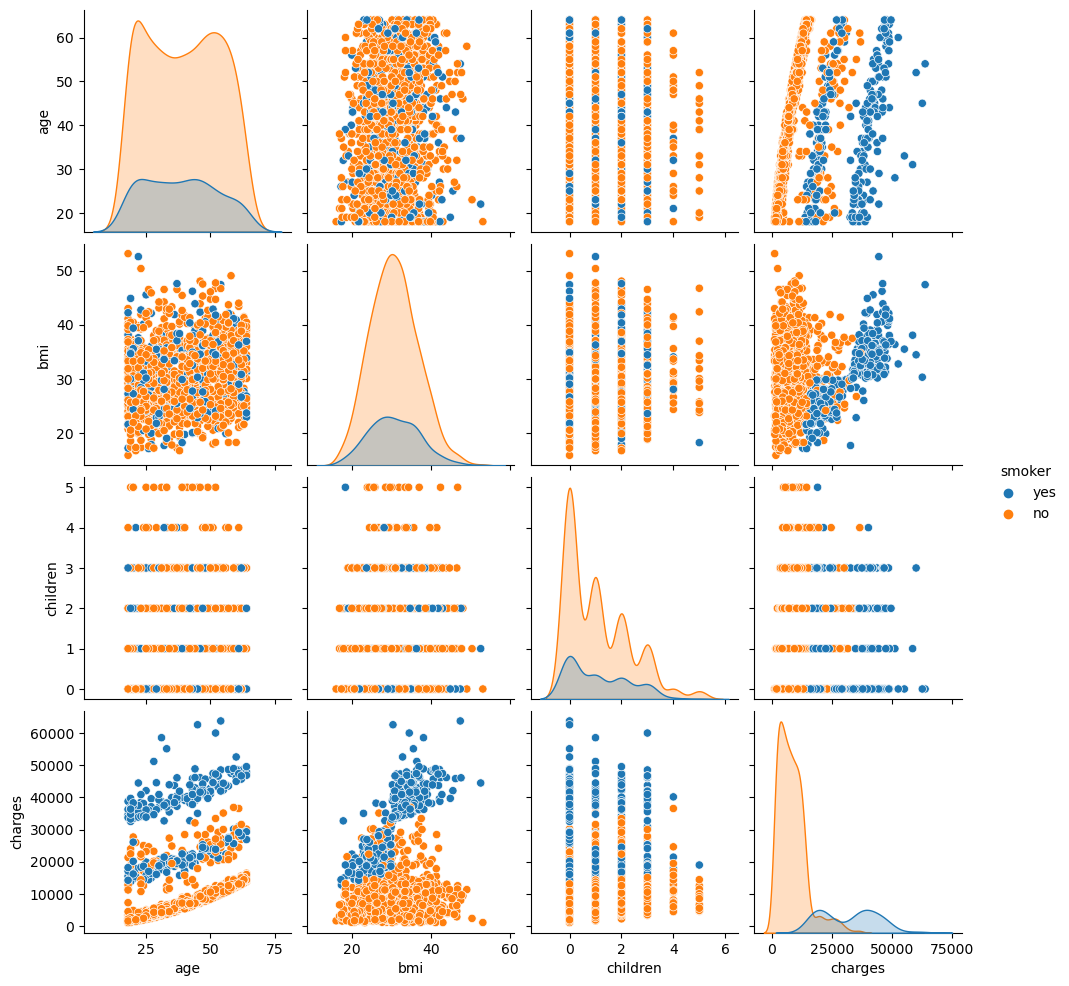

In [23]:
sns.pairplot(insurance_df, hue='smoker')

In [24]:
smoker.corr().style.background_gradient(cmap='PuBu')

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [25]:
smoker.loc[:,'high_bmi'] = smoker.bmi.apply(lambda x: 'yes' if x > np.median(smoker.bmi) else 'no')

/var/folders/7f/gzmkl43s6zxfn1x333qgfzvc0000gn/T/ipykernel_1332/3531427811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker.loc[:,'high_bmi'] = smoker.bmi.apply(lambda x: 'yes' if x > np.median(smoker.bmi) else 'no')


In [26]:
smoker[smoker.high_bmi=='yes'][['age', 'charges']].corr().style.background_gradient(cmap='PuBu')

,age,charges
age,1.000000,0.710172
charges,0.710172,1.000000


<AxesSubplot:xlabel='charges', ylabel='Density'>

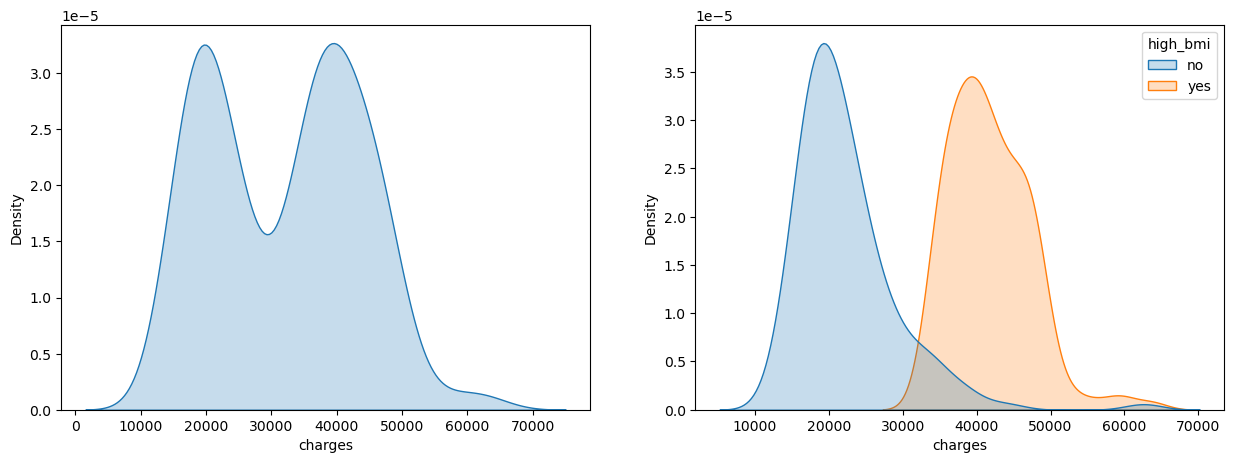

In [27]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.kdeplot(data=smoker,x='charges', fill=True, ax=axes[0])
sns.kdeplot(data=smoker,x='charges', fill=True, hue='high_bmi', ax=axes[1])

# Langkah 5: Pengujian Hipotesis

In [33]:
import scipy.stats as stats

**Question 1**



<AxesSubplot:xlabel='smoker', ylabel='charges'>

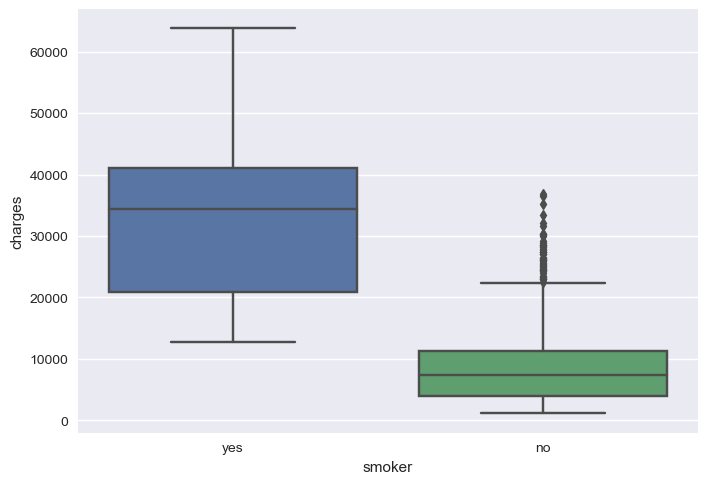

In [34]:
sns.boxplot(data=insurance_df, y='charges', x='smoker')

#### 3.1. Hipotesis

$$H_0: \mu_{charges, smokers} = \mu_{charges, nonsmokers}$$
$$H_1: \mu_{charges, smokers} > \mu_{charges, nonsmokers}$$

#### 1.2. Statistik Uji

In [35]:
from scipy.stats import ttest_ind

q1_stat, q1_p_value = ttest_ind(a = smoker.charges, 
                    b = nonsmoker.charges, 
                    equal_var=False, 
                    alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (q1_stat, q1_p_value))

Statistics = 32.7519, p-value = 0.0000


#### 1.3. Aturan Keputusan

In [36]:
from scipy.stats import t
t.ppf(q=1-0.05,df=(len(smoker.charges)-1))

1.6504543030215924

#### 1.4. Visualisasi Daerah Penolakan

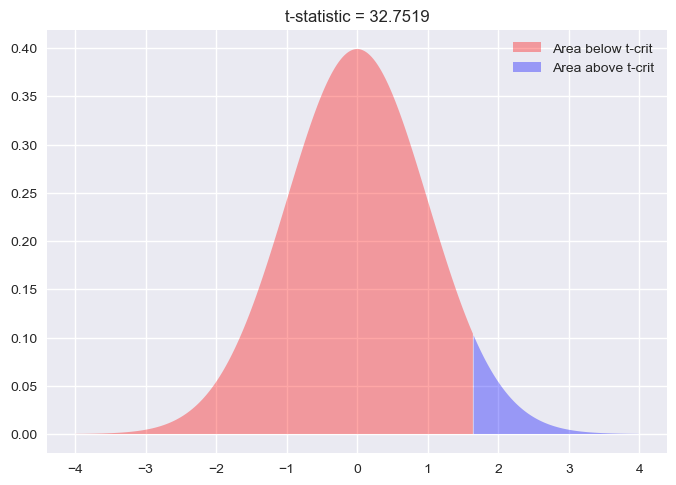

In [37]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.65,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.65,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below t-crit'
                 )

plt.fill_between(x=np.arange(1.65,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.65,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above t-crit')
plt.legend()
plt.title (f't-statistic = {q1_stat:.4f}');

In [38]:
if q1_p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accepting the Null hypothesis")

Reject the null hypothesis


## Question 2

**Apakah proporsi perokok laki-laki lebih besar dari perokok perempuan**

p1 = perokok laki-laki

p2 = perokok perempuan

#### 2.1. Hipotesis

$$ H_0 : p_1 \leq p_2$$
$$ H_1 : p_1 > p_2$$

<AxesSubplot:xlabel='sex', ylabel='count'>

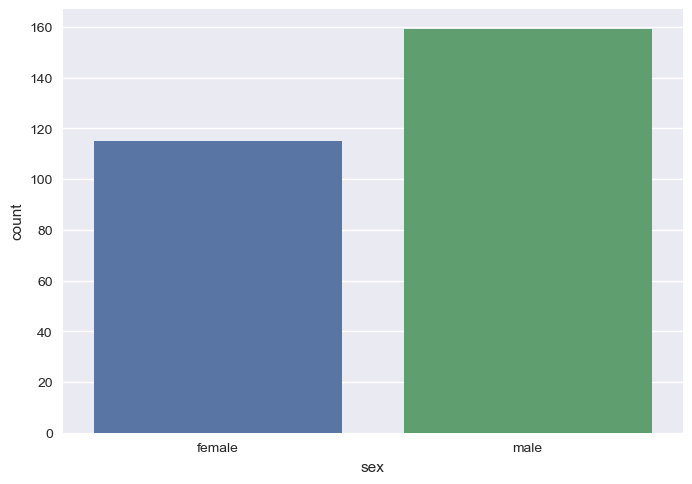

In [39]:
sns.countplot(data=smoker, x='sex')

#### 2.2. Statistik Uji

In [40]:
from statsmodels.stats.proportion import proportions_ztest

In [41]:
number_of_successes = np.array([len(male[male.smoker == 'yes']), len(female[female.smoker == 'yes'])])
total_sample_sizes = np.array([len(male),len(female)])

In [42]:
q2_stat, q2_p_value = proportions_ztest(number_of_successes, total_sample_sizes,alternative='larger')
print("The computed Z test statistic is: ",q2_stat)
print("The p-value is: ", q2_p_value)

The computed Z test statistic is:  2.7867402154855503
The p-value is:  0.002662057082160266


#### 2.3. Aturan Keputusan

In [43]:
z_crit=stats_.norm.ppf(1-0.05)
print(z_crit)

NameError: name 'stats_' is not defined

#### 2.4. Visualisasi Daerah Penolakan

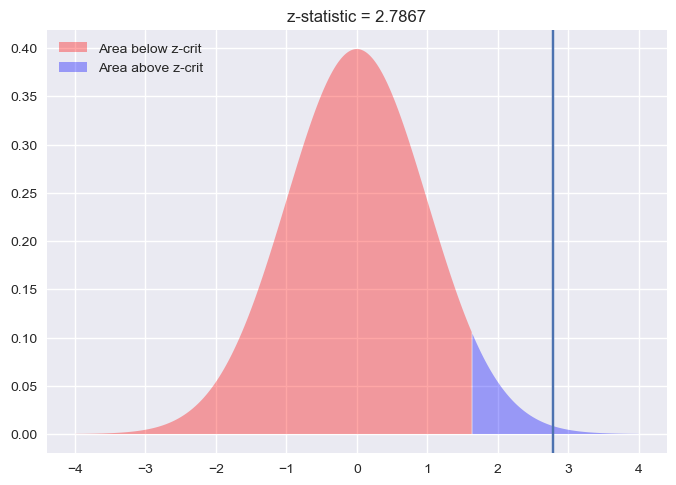

In [44]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.64,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.64,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.64,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.64,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')
plt.axvline(x=q2_stat)
plt.legend()
plt.title(f'z-statistic = {q2_stat:.4f}');

#### 2.5. Pengambilan Keputusan

In [45]:
if q2_p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accepting the Null hypothesis")

Reject the null hypothesis


# Question 3

In [46]:
insurance_df['has_children'] = insurance_df.children.apply(
    lambda x: 'yes' if x>0 else 'no')

In [47]:
print("Average charges of people who have children = %.0f" % 
      insurance_df[insurance_df.has_children == 'yes'].charges.mean())
print("Average charges of people who have no children = %.0f" %
      insurance_df[insurance_df.has_children == 'no'].charges.mean())

Average charges of people who have children = 13950
Average charges of people who have no children = 12366


#### 3.1. Hipotesis

$$H_0: \mu_{charges, nonparent} = \mu_{charges, parent}$$
$$H_1: \mu_{charges, nonparent} < \mu_{charges, parent}$$

#### 3.2. Statistik Uji

In [48]:
from scipy.stats import ttest_ind

q3_stat, q3_p_value = ttest_ind(a = insurance_df[insurance_df.has_children == 'no'].charges, 
                    b = insurance_df[insurance_df.has_children == 'yes'].charges, 
                    equal_var=False, 
                    alternative='less')
# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (q3_stat, q3_p_value))

Statistics = -2.3753, p-value = 0.0088


#### 3.3. Aturan Keputusan


In [49]:
t.ppf(q=0.05,df=(len(smoker.charges)-1))

-1.650454303021593

#### 3.4. Visualisasi Daerah Penolakan

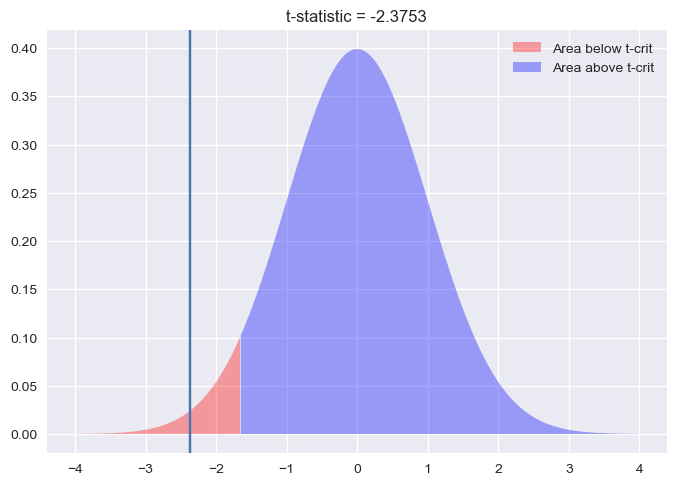

In [50]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,-1.65,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1.65,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below t-crit'
                 )

plt.fill_between(x=np.arange(-1.65,4,0.01), 
                 y1= stats.norm.pdf(np.arange(-1.65,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above t-crit')
plt.axvline(x=q3_stat)
plt.legend()
plt.title (f't-statistic = {q3_stat:.4f}');

#### 3.5. Pengambilan Keputusan

In [110]:
if q3_p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accepting the Null hypothesis")

Reject the null hypothesis
